In [4]:
# Import para visualizar as pastas
import os
import sys

# Adiciona a pasta raiz do projeto ao path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from pathlib import Path

In [5]:
# import das bibliotecas utilizadas para exploração do dataframe
from src.data.load_data import load_custom_csv
import pandas as pd
import seaborn as sns
from src.features.build_features import std_scaler_feature, minmax_scaler_feature, robust_scaler_feature

In [6]:
# Carregando o dataframe do data/processed/AEP_hourly_update.csv
df = load_custom_csv("AEP_hourly_update.csv")

In [7]:
# Transformando coluna Datetime em colunas anos, meses, dias, horas, dia da semana e é fim de semana
df_update = df.copy()
df_update['Datetime'] = pd.to_datetime(df_update['Datetime'])
df_update['year'] = df_update['Datetime'].dt.year
df_update['month'] = df_update['Datetime'].dt.month
df_update['day'] = df_update['Datetime'].dt.day
df_update['hour'] = df_update['Datetime'].dt.hour
df_update['dayofweek'] = df_update['Datetime'].dt.dayofweek
df_update['is_weekend'] = (df_update['Datetime'].dt.dayofweek >= 5).astype(int)

In [8]:
df_update.to_csv("../data/processed/AEP_ready.csv", index=False)

# Preprocessamento e validação AEP_ready.csv

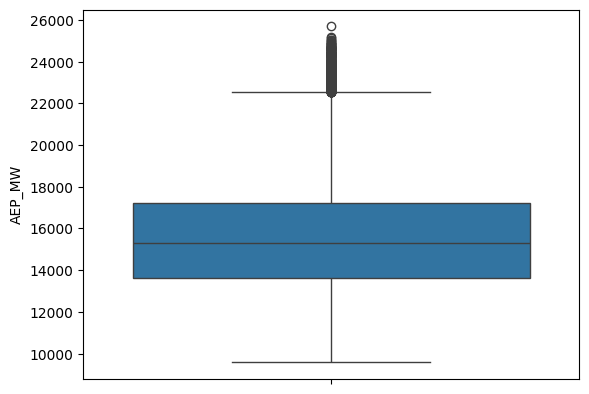

In [9]:
# Antes do pré processamento
ax = sns.boxplot(df_update['AEP_MW'])

In [13]:
df_scaled, scaler = robust_scaler_feature(df_update, ['AEP_MW'])

In [14]:
display(df_scaled)
print(scaler)

,Datetime,AEP_MW,year,month,day,hour,dayofweek,is_weekend
0,2004-10-01 01:00:00,-0.821008,2004,10,1,1,4,0
1,2004-10-01 02:00:00,-0.945378,2004,10,1,2,4,0
2,2004-10-01 03:00:00,-1.013445,2004,10,1,3,4,0
3,2004-10-01 04:00:00,-1.040056,2004,10,1,4,4,0
4,2004-10-01 05:00:00,-1.016527,2004,10,1,5,4,0
...,...,...,...,...,...,...,...,...
121268,2018-08-02 20:00:00,0.661905,2018,8,2,20,3,0
121269,2018-08-02 21:00:00,0.558263,2018,8,2,21,3,0
121270,2018-08-02 22:00:00,0.473669,2018,8,2,22,3,0
121271,2018-08-02 23:00:00,0.183193,2018,8,2,23,3,0


RobustScaler()


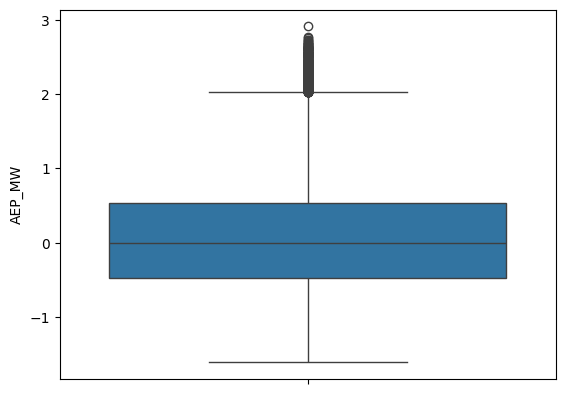

In [15]:
ax = sns.boxplot(df_scaled['AEP_MW'])